# WORLD HAPPINESS REPORT
submitted by Akhil Reddy Batch No:1839

In [113]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

we have World Happiness Report of 2012, 2013, 2015, 2016 2017
report ranks 155 countries by their happiness levels

In [114]:
df = pd.read_csv('happiness_score_dataset.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# Variables Used in Data:

Country: Countr Name.

Region: The region that the country belongs too.

Economy: GDP per capita of the country — individuals rank they quality of life based on the amount they earn

Family: quality of family life, nuclear and joint family

Health: ranking healthcare availability and average life expectancy in the country

Freedom: how much an individual is able to conduct them self based on their free will

Trust: in the government to not be corrupt

Generosity: how much their country is involved in peacekeeping and global aid

Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).

In [115]:
#lets check the columns present in df
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

we have 12 columns present

In [116]:
#lets check the shape of the dataframe
df.shape

(158, 12)

we have 158 rows and 12 columns

#lets get the information of the data set
df.info()

from this we can see that there are no null values in data frame and also it give sus information of datatypes of each column

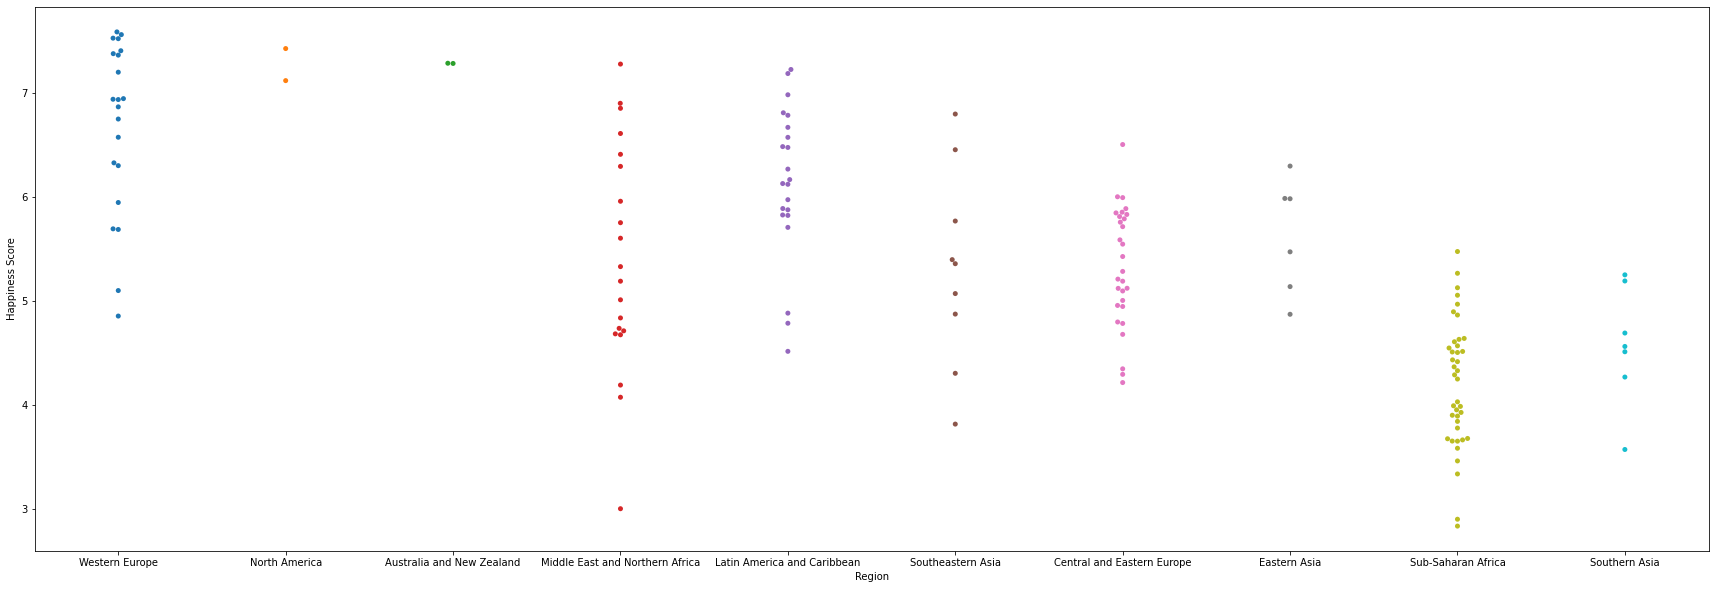

In [117]:
plt.figure(figsize=[30,10])
sns.swarmplot(x = 'Region', y= 'Happiness Score',data=df)
plt.show()

This graph shows the happiness scores in different regions

In [118]:
#as the country and region are not serving any purpose in the df we can drop them
df.drop(['Country','Region'],axis=1,inplace = True)
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [119]:
#letsget the description(statistics) of the data 
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


we can see there is not much difference in mean and median

<AxesSubplot:>

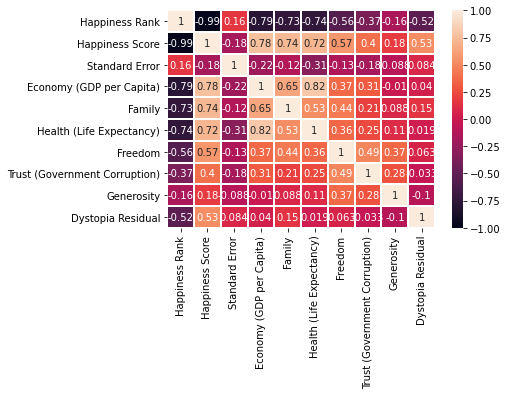

In [120]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=+1,linewidth=1)

As we can see there is very bad correlation for the Happines rank in the  population lets drop it

<function matplotlib.pyplot.show(close=None, block=None)>

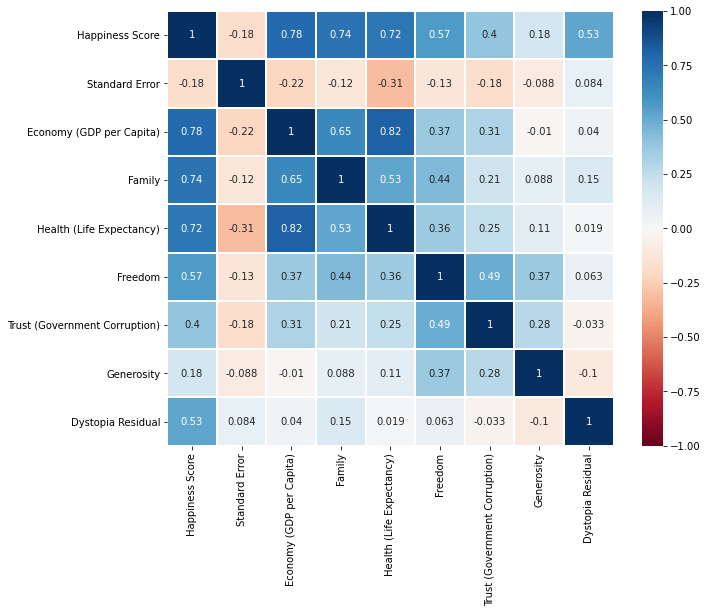

In [121]:
df.drop(['Happiness Rank'],axis=1,inplace = True)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=+1,linewidth=1)
plt.show

we can see there is no neagtive correaltion now

In [122]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Data visualisation

lets check the distributions 

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

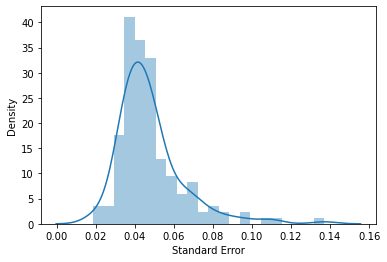

In [123]:
sns.distplot(df['Standard Error'])

Standarad error is skewed a little bit

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

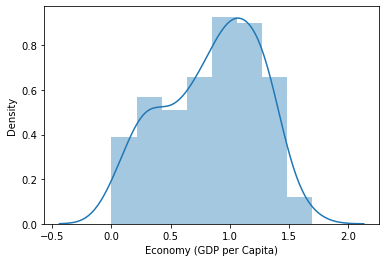

In [124]:
sns.distplot(df['Economy (GDP per Capita)'])

Economy (GDP per Capita) is normally distributed

<AxesSubplot:xlabel='Family', ylabel='Density'>

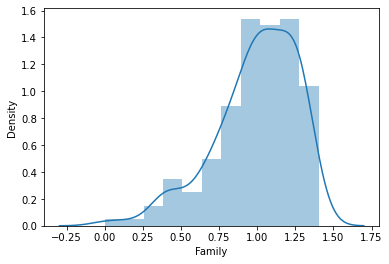

In [125]:
sns.distplot(df['Family'])

Family has the skewness in it

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

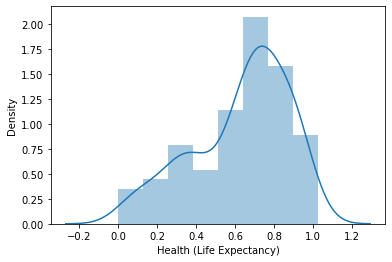

In [126]:
sns.distplot(df['Health (Life Expectancy)'])

There is some skewness in this

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

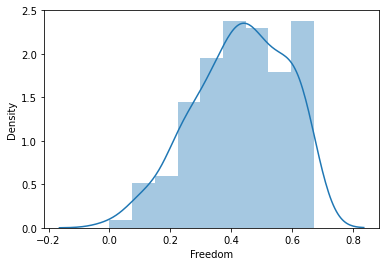

In [127]:
sns.distplot(df['Freedom'])

it looks like normal distribution

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

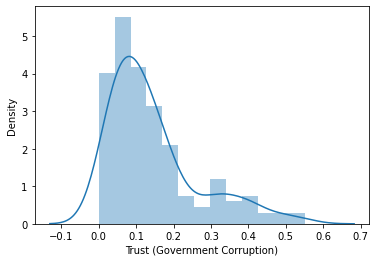

In [128]:
sns.distplot(df['Trust (Government Corruption)'])

Skewness is present

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

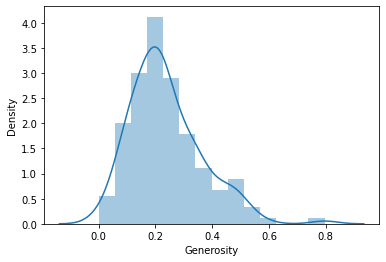

In [129]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

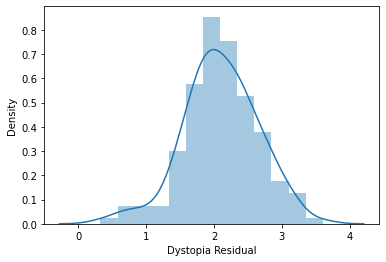

In [130]:
sns.distplot(df['Dystopia Residual'])

# Preapring Training and Test Data

In [131]:
# Splitting Happiness Score from rest of dataset as it the traget variable
Y = df['Happiness Score']
X = df.drop(columns=['Happiness Score'])

In [132]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [133]:
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

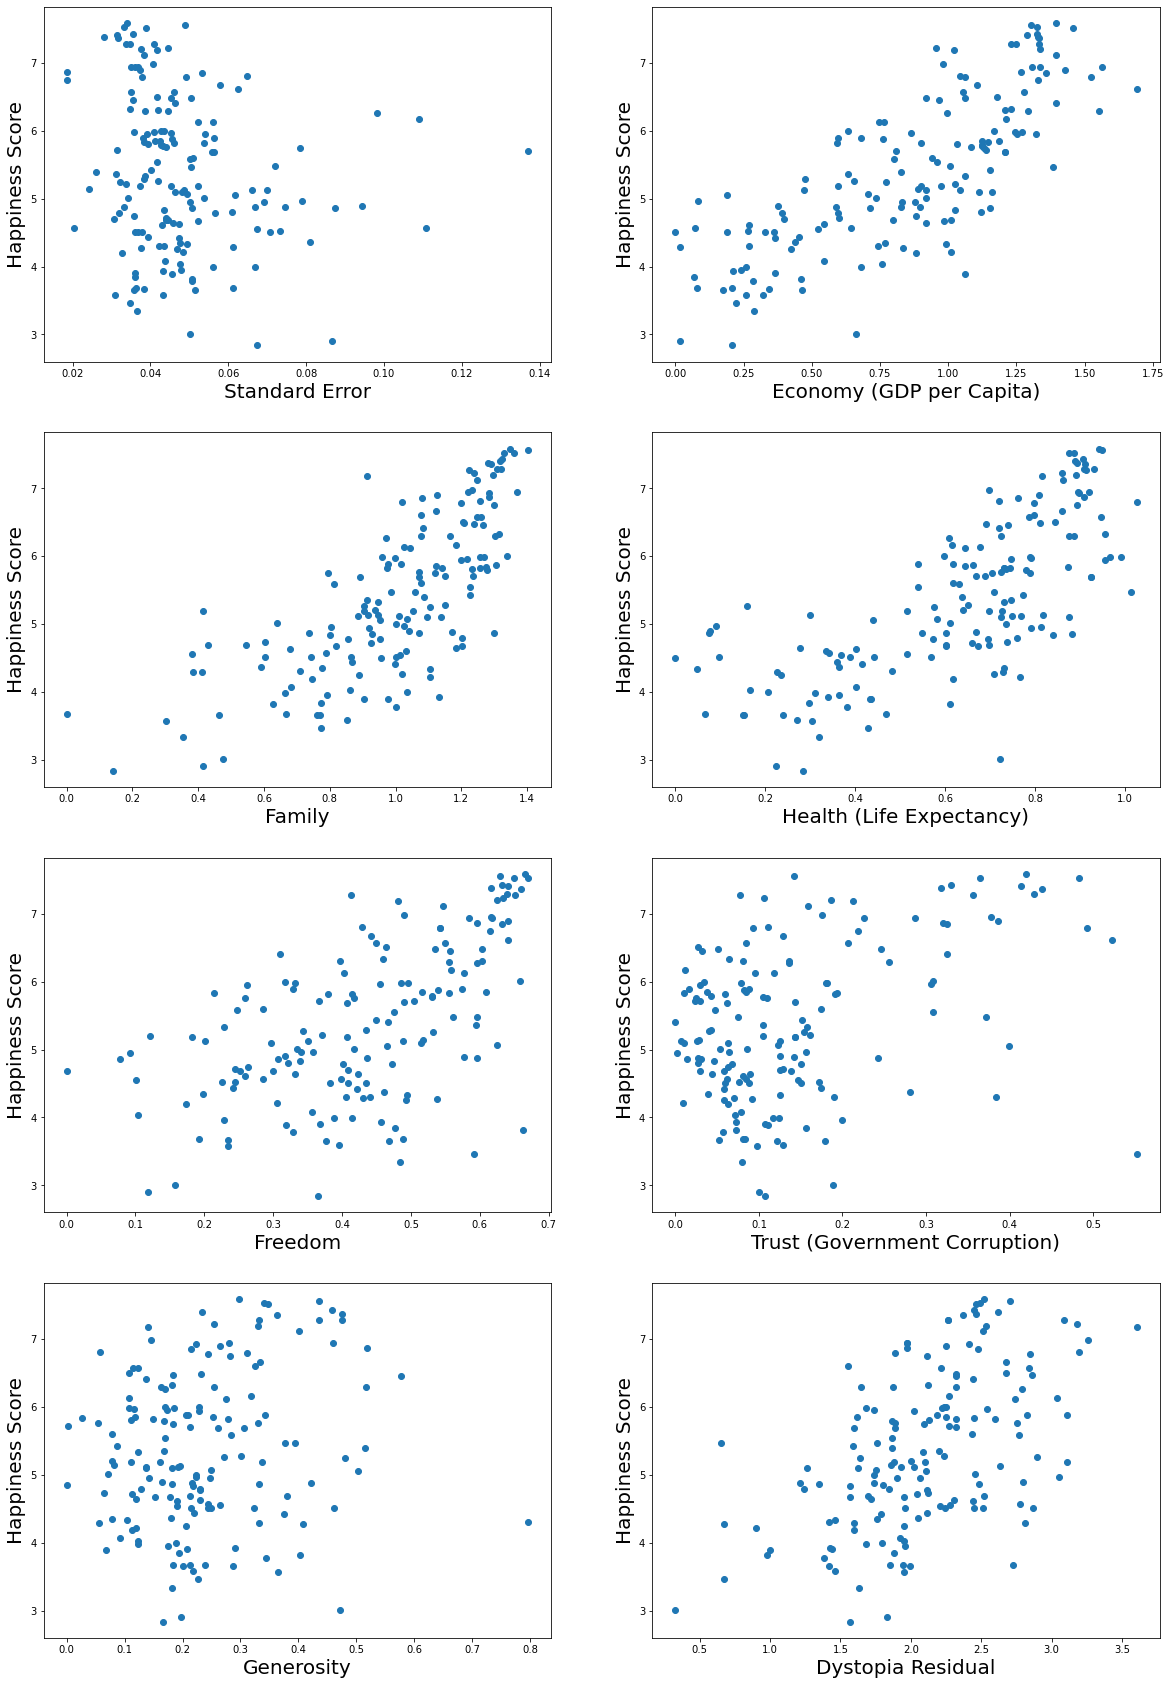

In [134]:
# Visualizing relationship

plt.figure(figsize=(20,30),facecolor = 'White')
plotnumber = 1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.show()

In [135]:
#scaling data except target variable
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns) 

In [136]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.22,random_state=42)

In [137]:

model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9999999389956291

In [138]:
pred=model.predict(x_test)

In [139]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':pred})
data.head()

,Acutal data,Predicted data
128,4.307,4.306914
45,5.987,5.987100
134,4.194,4.194262
156,2.905,2.904493
90,5.057,5.057195


In [141]:
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error : 0.00022727721892128777
Mean squared error : 7.372954501483041e-08
Root mean squared error : 0.0002715318489879786


MODEL IS WORKING WITH 99% ACCURACY